In [1]:
!pip install --upgrade scikit-learn xgboost joblib matplotlib seaborn pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 43.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

Using Colab cache for faster access to the 'brazilian-ecommerce' dataset.


In [3]:
path

'/kaggle/input/brazilian-ecommerce'

This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract.

The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil.
It is available in different sets of columns now we will merge and extract what we need only.

In [4]:
customer_dataset = pd.read_csv(f'{path}/olist_customers_dataset.csv')
customer_dataset.dtypes

,0
customer_id,object
customer_unique_id,object
customer_zip_code_prefix,int64
customer_city,object
customer_state,object


In [5]:
geolocation_dataset = pd.read_csv(f'{path}/olist_geolocation_dataset.csv')
geolocation_dataset.dtypes

,0
geolocation_zip_code_prefix,int64
geolocation_lat,float64
geolocation_lng,float64
geolocation_city,object
geolocation_state,object


In [6]:
order_items_dataset = pd.read_csv(f'{path}/olist_order_items_dataset.csv')
order_items_dataset.dtypes

,0
order_id,object
order_item_id,int64
product_id,object
seller_id,object
shipping_limit_date,object
price,float64
freight_value,float64


In [7]:
order_payments_dataset = pd.read_csv(f'{path}/olist_order_payments_dataset.csv')
order_payments_dataset.dtypes

,0
order_id,object
payment_sequential,int64
payment_type,object
payment_installments,int64
payment_value,float64


In [8]:
order_reviews_dataset = pd.read_csv(f'{path}/olist_order_reviews_dataset.csv')
order_reviews_dataset.dtypes

,0
review_id,object
order_id,object
review_score,int64
review_comment_title,object
review_comment_message,object
review_creation_date,object
review_answer_timestamp,object


In [9]:
orders_dataset = pd.read_csv(f'{path}/olist_orders_dataset.csv')
orders_dataset.dtypes

,0
order_id,object
customer_id,object
order_status,object
order_purchase_timestamp,object
order_approved_at,object
order_delivered_carrier_date,object
order_delivered_customer_date,object
order_estimated_delivery_date,object


In [10]:
products_dataset = pd.read_csv(f'{path}/olist_products_dataset.csv')
products_dataset.dtypes

,0
product_id,object
product_category_name,object
product_name_lenght,float64
product_description_lenght,float64
product_photos_qty,float64
product_weight_g,float64
product_length_cm,float64
product_height_cm,float64
product_width_cm,float64


In [11]:
seller_dataset = pd.read_csv(f'{path}/olist_sellers_dataset.csv')
seller_dataset.dtypes

,0
seller_id,object
seller_zip_code_prefix,int64
seller_city,object
seller_state,object


In [12]:
product_category_dataset = pd.read_csv(f'{path}/product_category_name_translation.csv')
product_category_dataset.dtypes

,0
product_category_name,object
product_category_name_english,object


In [13]:
geolocation_dataset

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [14]:
customer_dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [15]:
orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [16]:
order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [17]:
order_payments_dataset

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [18]:
products_dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [19]:
seller_dataset

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [20]:
order_reviews_dataset

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


Now by obersiving above datasets, I figured out which ones I need for our model.

In [21]:
customer_dataset = customer_dataset[['customer_id', 'customer_unique_id', 'customer_state']]

orders_dataset = orders_dataset[['order_id', 'customer_id', 'order_status',
                 'order_purchase_timestamp', 'order_delivered_customer_date',
                 'order_estimated_delivery_date']]

order_items_dataset = order_items_dataset[['order_id', 'order_item_id', 'product_id',
                           'price', 'freight_value']]

order_payments_dataset = order_payments_dataset[['order_id', 'payment_sequential', 'payment_type',
                           'payment_installments', 'payment_value']]

products_dataset = products_dataset[['product_id', 'product_category_name', 'product_description_lenght', 'product_photos_qty']]

order_reviews_dataset = order_reviews_dataset[['order_id', 'review_score', 'review_creation_date']]

In [22]:
df = pd.merge(orders_dataset, customer_dataset, on='customer_id', how='left')
df = pd.merge(df, order_items_dataset, on='order_id', how='left')
df = pd.merge(df, products_dataset, on='product_id', how='left')
df = pd.merge(df, order_payments_dataset, on='order_id', how='left')
df = pd.merge(df, order_reviews_dataset, on='order_id', how='left')

In [23]:
df.sort_values('order_purchase_timestamp', ascending=True, inplace=True)

In [24]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_state,order_item_id,product_id,...,freight_value,product_category_name,product_description_lenght,product_photos_qty,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date
5359,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,NaN,2016-10-20 00:00:00,b7d76e111c89f7ebf14761390f0f7d17,RR,1.0,c1488892604e4ba5cff5b4eb4d595400,...,31.67,moveis_decoracao,426.0,2.0,1.0,credit_card,1.0,136.23,1.0,2016-10-22 00:00:00
5360,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,NaN,2016-10-20 00:00:00,b7d76e111c89f7ebf14761390f0f7d17,RR,2.0,f293394c72c9b5fafd7023301fc21fc2,...,31.67,moveis_decoracao,754.0,3.0,1.0,credit_card,1.0,136.23,1.0,2016-10-22 00:00:00
5198,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,NaN,2016-10-28 00:00:00,4854e9b3feff728c13ee5fc7d1547e92,RS,1.0,f3c2d01a84c947b078e32bbef0718962,...,15.56,telefonia,381.0,1.0,1.0,credit_card,3.0,75.06,1.0,2016-10-29 00:00:00
11996,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,NaN,2016-09-30 00:00:00,009b0127b727ab0ba422f6d9604487c7,SP,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,credit_card,2.0,40.95,1.0,2016-10-02 00:00:00
36864,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-11-09 07:47:38,2016-10-04 00:00:00,830d5b7aaa3b6f1e9ad63703bec97d23,SP,1.0,5a6b04657a4c5ee34285d1e4619a96b4,...,2.83,beleza_saude,1036.0,1.0,NaN,NaN,NaN,NaN,1.0,2016-10-06 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60308,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29 09:13:03,NaN,2018-10-15 00:00:00,9bb92bebd4cb7511e1a02d5e50bc4655,SP,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,voucher,1.0,137.03,1.0,2018-08-26 00:00:00
105869,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01 15:30:09,NaN,2018-10-23 00:00:00,634420a0ea42302205032ed44ac7fccc,RJ,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,voucher,1.0,80.38,2.0,2018-08-23 00:00:00
38270,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03 18:55:29,NaN,2018-10-16 00:00:00,af5454198a97379394cacf676e1e96cb,SP,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,voucher,1.0,197.55,1.0,2018-08-18 00:00:00
81748,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:02,NaN,2018-11-12 00:00:00,262e1f1e26e92e86375f86840b4ffd63,PI,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,voucher,1.0,222.03,5.0,2018-06-27 00:00:00


In [25]:
# now finnaly the data is in our hands.

In [26]:
df.describe()

,order_item_id,price,freight_value,product_description_lenght,product_photos_qty,payment_sequential,payment_installments,payment_value,review_score
count,118310.000000,118310.000000,118310.000000,116601.000000,116601.000000,119140.000000,119140.000000,119140.000000,118146.000000
mean,1.196543,120.646603,20.032387,785.967822,2.205161,1.094737,2.941246,172.735135,4.015582
std,0.699489,184.109691,15.836850,652.584121,1.717452,0.730141,2.777848,267.776077,1.400436
min,1.000000,0.850000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,39.900000,13.080000,346.000000,1.000000,1.000000,1.000000,60.850000,4.000000
50%,1.000000,74.900000,16.280000,600.000000,1.000000,1.000000,2.000000,108.160000,5.000000
75%,1.000000,134.900000,21.180000,983.000000,3.000000,1.000000,4.000000,189.240000,5.000000
max,21.000000,6735.000000,409.680000,3992.000000,20.000000,29.000000,24.000000,13664.080000,5.000000


In [27]:
df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_delivered_customer_date,3421
order_estimated_delivery_date,0
customer_unique_id,0
customer_state,0
order_item_id,833
product_id,833


In [28]:
df = df.dropna(subset=['order_item_id', 'product_id', 'price', 'freight_value'])

df = df.dropna(subset=['payment_type', 'payment_value', 'payment_sequential', 'payment_installments'])

df = df[df['order_status'] == 'delivered']

df['product_category_name'] = df['product_category_name'].fillna('Unknown')
df['product_description_lenght'] = df['product_description_lenght'].fillna(df['product_description_lenght'].median())
df['product_photos_qty'] = df['product_photos_qty'].fillna(df['product_photos_qty'].median())

df['review_score'] = df['review_score'].fillna(-1)
df['review_creation_date'] = df['review_creation_date'].fillna(pd.NaT)

In [29]:
df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_delivered_customer_date,8
order_estimated_delivery_date,0
customer_unique_id,0
customer_state,0
order_item_id,0
product_id,0


In [30]:
df['delivered_days'] = np.where(df['order_delivered_customer_date'].notnull(), (pd.to_datetime(df['order_delivered_customer_date']) - pd.to_datetime(df['order_purchase_timestamp'])).dt.days, (pd.to_datetime(df['order_estimated_delivery_date']) - pd.to_datetime(df['order_purchase_timestamp'])).dt.days)
df['estimated_days'] = (pd.to_datetime(df['order_estimated_delivery_date']) - pd.to_datetime(df['order_purchase_timestamp'])).dt.days
df['delivery_diff_than_estimated'] = df['estimated_days'] - df['delivered_days']
df['reviewed_days'] = np.where(df['review_creation_date'].notnull(), (pd.to_datetime(df['review_creation_date']) - pd.to_datetime(df['order_delivered_customer_date'])).dt.days.clip(lower=0), 0)

In [31]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_state,order_item_id,product_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date,delivered_days,estimated_days,delivery_diff_than_estimated,reviewed_days
111677,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-26 14:02:13,2016-10-27 00:00:00,32ea3bdedab835c3aa6cb68ce66565ef,SP,1.0,3ae08df6bcbfe23586dd431c40bddbb7,...,1.0,boleto,1.0,45.46,4.0,2016-10-26 00:00:00,23.0,23,0.0,0.0
34077,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,2016-10-27 18:19:38,2016-11-07 00:00:00,2f64e403852e6893ae37485d5fcacdaf,RS,1.0,fd7fd78fd3cbc1b0a6370a7909c0a629,...,1.0,boleto,1.0,39.09,4.0,2016-10-28 00:00:00,24.0,34,10.0,0.0
117323,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:36,2016-11-03 10:58:07,2016-11-29 00:00:00,61db744d2f835035a5625b59350c6b63,RS,1.0,b72b39418216e944bb34e35f4d3ea8c7,...,1.0,boleto,1.0,53.73,3.0,2016-11-04 00:00:00,30.0,56,26.0,0.0
105840,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03 22:06:03,2016-10-31 11:07:42,2016-11-23 00:00:00,8d3a54507421dbd2ce0a1d58046826e0,SP,1.0,107177bf61755f05c604fe57e02467d6,...,1.0,credit_card,6.0,133.46,1.0,2016-11-01 00:00:00,27.0,50,23.0,0.0
8004,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03 22:31:31,2016-10-14 16:08:00,2016-11-23 00:00:00,87776adb449c551e74c13fc34f036105,SP,1.0,e2a1d45a73dc7f5a7f9236b043431b89,...,1.0,credit_card,4.0,40.95,5.0,2016-10-19 00:00:00,10.0,50,40.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36061,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018-08-30 16:24:55,2018-09-04 00:00:00,5c58de6fb80e93396e2f35642666b693,PR,2.0,2b4472df15512a2825ae86fd9ae79335,...,1.0,credit_card,8.0,510.96,5.0,2018-08-31 00:00:00,1.0,5,4.0,0.0
36060,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018-08-30 16:24:55,2018-09-04 00:00:00,5c58de6fb80e93396e2f35642666b693,PR,1.0,2b4472df15512a2825ae86fd9ae79335,...,1.0,credit_card,8.0,510.96,5.0,2018-08-31 00:00:00,1.0,5,4.0,0.0
37814,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:18:28,2018-08-30 16:52:31,2018-09-11 00:00:00,7febafa06d9d8f232a900a2937f04338,MG,1.0,bdcf6a834e8faa30dac3886c7a58e92e,...,1.0,voucher,1.0,61.29,5.0,2018-08-31 00:00:00,1.0,12,11.0,0.0
83286,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 14:52:00,2018-08-30 16:36:59,2018-09-03 00:00:00,b701bebbdf478f5500348f03aff62121,SP,1.0,c7f27c5bef2338541c772b5776403e6a,...,1.0,credit_card,1.0,33.23,3.0,2018-08-31 00:00:00,1.0,4,3.0,0.0


In [32]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

last_purchase_date = df['order_purchase_timestamp'].max()

churn_threshold = pd.Timedelta(days=90)

customer_last_purchase = df.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
customer_last_purchase['days_since_last_purchase'] = (last_purchase_date - customer_last_purchase['order_purchase_timestamp']).dt.days

customer_last_purchase['churn'] = (customer_last_purchase['days_since_last_purchase'] > 90).astype(int)

df = df.merge(customer_last_purchase[['customer_unique_id', 'churn']], on='customer_unique_id', how='left')

In [33]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_state,order_item_id,product_id,...,payment_type,payment_installments,payment_value,review_score,review_creation_date,delivered_days,estimated_days,delivery_diff_than_estimated,reviewed_days,churn
0,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-26 14:02:13,2016-10-27 00:00:00,32ea3bdedab835c3aa6cb68ce66565ef,SP,1.0,3ae08df6bcbfe23586dd431c40bddbb7,...,boleto,1.0,45.46,4.0,2016-10-26 00:00:00,23.0,23,0.0,0.0,0
1,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,2016-10-27 18:19:38,2016-11-07 00:00:00,2f64e403852e6893ae37485d5fcacdaf,RS,1.0,fd7fd78fd3cbc1b0a6370a7909c0a629,...,boleto,1.0,39.09,4.0,2016-10-28 00:00:00,24.0,34,10.0,0.0,1
2,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:36,2016-11-03 10:58:07,2016-11-29 00:00:00,61db744d2f835035a5625b59350c6b63,RS,1.0,b72b39418216e944bb34e35f4d3ea8c7,...,boleto,1.0,53.73,3.0,2016-11-04 00:00:00,30.0,56,26.0,0.0,1
3,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03 22:06:03,2016-10-31 11:07:42,2016-11-23 00:00:00,8d3a54507421dbd2ce0a1d58046826e0,SP,1.0,107177bf61755f05c604fe57e02467d6,...,credit_card,6.0,133.46,1.0,2016-11-01 00:00:00,27.0,50,23.0,0.0,1
4,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03 22:31:31,2016-10-14 16:08:00,2016-11-23 00:00:00,87776adb449c551e74c13fc34f036105,SP,1.0,e2a1d45a73dc7f5a7f9236b043431b89,...,credit_card,4.0,40.95,5.0,2016-10-19 00:00:00,10.0,50,40.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115715,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018-08-30 16:24:55,2018-09-04 00:00:00,5c58de6fb80e93396e2f35642666b693,PR,2.0,2b4472df15512a2825ae86fd9ae79335,...,credit_card,8.0,510.96,5.0,2018-08-31 00:00:00,1.0,5,4.0,0.0,0
115716,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018-08-30 16:24:55,2018-09-04 00:00:00,5c58de6fb80e93396e2f35642666b693,PR,1.0,2b4472df15512a2825ae86fd9ae79335,...,credit_card,8.0,510.96,5.0,2018-08-31 00:00:00,1.0,5,4.0,0.0,0
115717,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:18:28,2018-08-30 16:52:31,2018-09-11 00:00:00,7febafa06d9d8f232a900a2937f04338,MG,1.0,bdcf6a834e8faa30dac3886c7a58e92e,...,voucher,1.0,61.29,5.0,2018-08-31 00:00:00,1.0,12,11.0,0.0,0
115718,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 14:52:00,2018-08-30 16:36:59,2018-09-03 00:00:00,b701bebbdf478f5500348f03aff62121,SP,1.0,c7f27c5bef2338541c772b5776403e6a,...,credit_card,1.0,33.23,3.0,2018-08-31 00:00:00,1.0,4,3.0,0.0,0


In [34]:
# Dropping Redundunt and unnecessary columns

In [35]:
df.drop(columns=['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_unique_id', 'order_item_id', 'product_id', 'review_creation_date', 'delivered_days', 'estimated_days'], axis=1, inplace=True)

In [36]:
df

,customer_state,price,freight_value,product_category_name,product_description_lenght,product_photos_qty,payment_sequential,payment_type,payment_installments,payment_value,review_score,delivery_diff_than_estimated,reviewed_days,churn
0,SP,29.90,15.56,relogios_presentes,1642.0,3.0,1.0,boleto,1.0,45.46,4.0,0.0,0.0,0
1,RS,21.90,17.19,esporte_lazer,518.0,1.0,1.0,boleto,1.0,39.09,4.0,10.0,0.0,1
2,RS,36.49,17.24,esporte_lazer,141.0,1.0,1.0,boleto,1.0,53.73,3.0,26.0,0.0,1
3,SP,119.90,13.56,moveis_decoracao,130.0,1.0,1.0,credit_card,6.0,133.46,1.0,23.0,0.0,1
4,SP,29.99,10.96,fashion_calcados,459.0,2.0,1.0,credit_card,4.0,40.95,5.0,40.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115715,PR,209.00,46.48,moveis_cozinha_area_de_servico_jantar_e_jardim,112.0,1.0,1.0,credit_card,8.0,510.96,5.0,4.0,0.0,0
115716,PR,209.00,46.48,moveis_cozinha_area_de_servico_jantar_e_jardim,112.0,1.0,1.0,credit_card,8.0,510.96,5.0,4.0,0.0,0
115717,MG,45.90,15.39,beleza_saude,394.0,1.0,1.0,voucher,1.0,61.29,5.0,11.0,0.0,0
115718,SP,24.90,8.33,artigos_de_festas,429.0,1.0,1.0,credit_card,1.0,33.23,3.0,3.0,0.0,0


In [37]:
# EDA

In [38]:
df.describe()

,price,freight_value,product_description_lenght,product_photos_qty,payment_sequential,payment_installments,payment_value,review_score,delivery_diff_than_estimated,reviewed_days,churn
count,115720.000000,115720.000000,115720.000000,115720.000000,115720.000000,115720.000000,115720.000000,115720.000000,115720.000000,115712.000000,115720.000000
mean,119.913038,19.981844,782.231766,2.189362,1.091272,2.940572,171.810794,4.042767,11.452446,0.137894,0.802757
std,182.672222,15.718251,646.298133,1.711701,0.686737,2.776111,265.642619,1.411771,10.169603,1.720192,0.397919
min,0.850000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,-189.000000,0.000000,0.000000
25%,39.900000,13.080000,348.000000,1.000000,1.000000,1.000000,60.850000,4.000000,7.000000,0.000000,1.000000
50%,74.900000,16.280000,600.000000,1.000000,1.000000,2.000000,108.110000,5.000000,12.000000,0.000000,1.000000
75%,132.900000,21.160000,977.000000,3.000000,1.000000,4.000000,188.940000,5.000000,17.000000,0.000000,1.000000
max,6735.000000,409.680000,3992.000000,20.000000,26.000000,24.000000,13664.080000,5.000000,146.000000,106.000000,1.000000


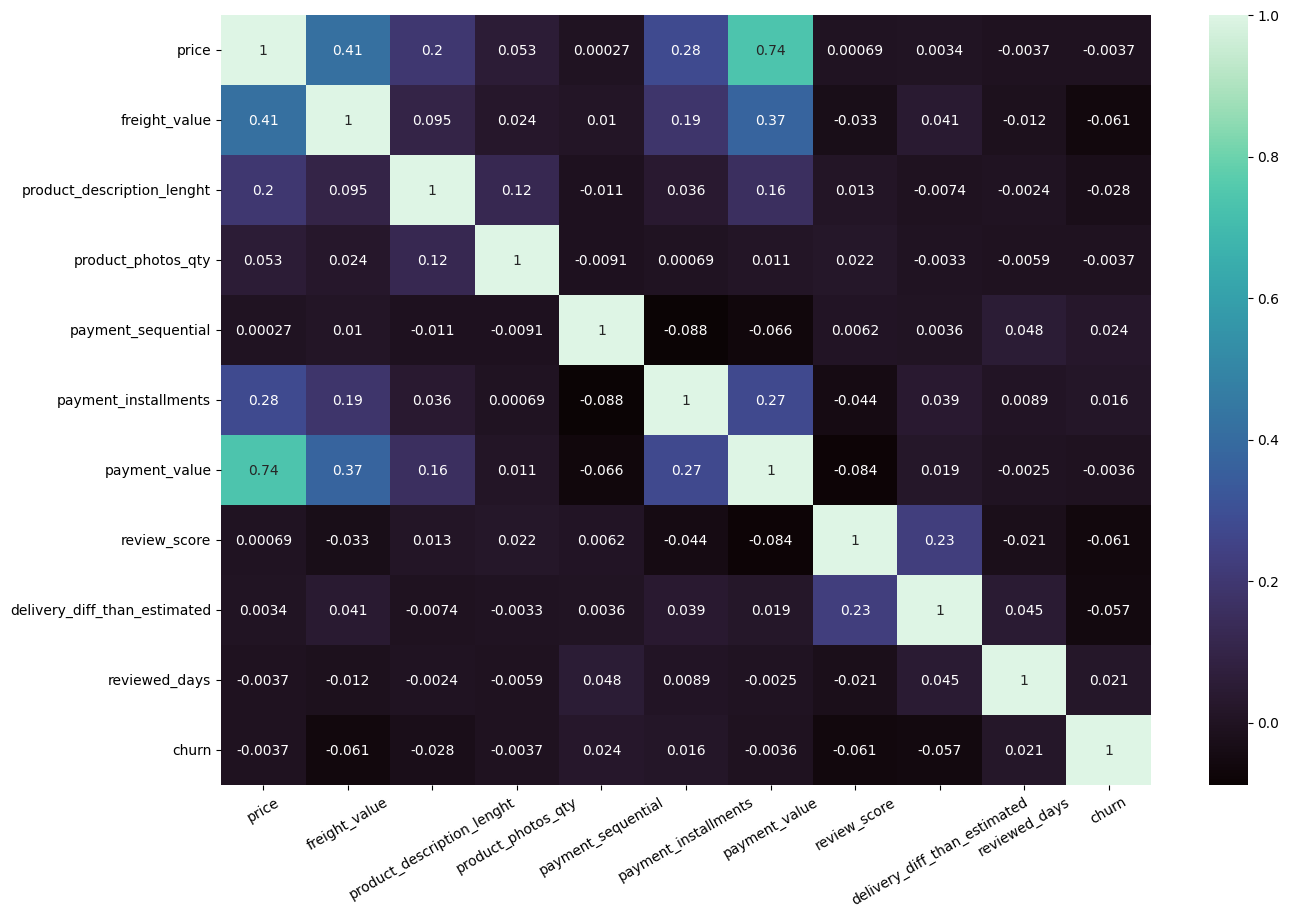

In [39]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='mako')
plt.xticks(rotation=30)
plt.show()

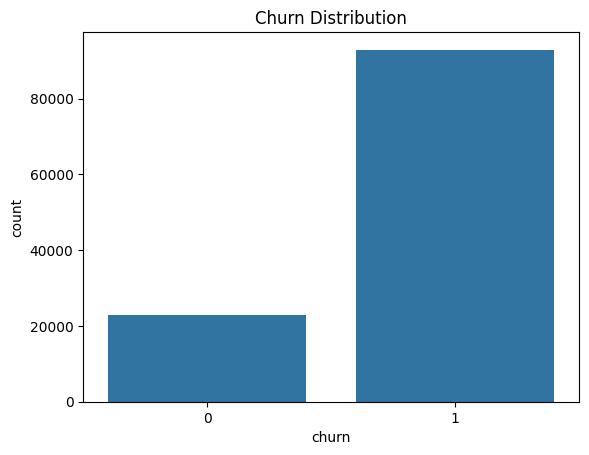

In [40]:
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.show()

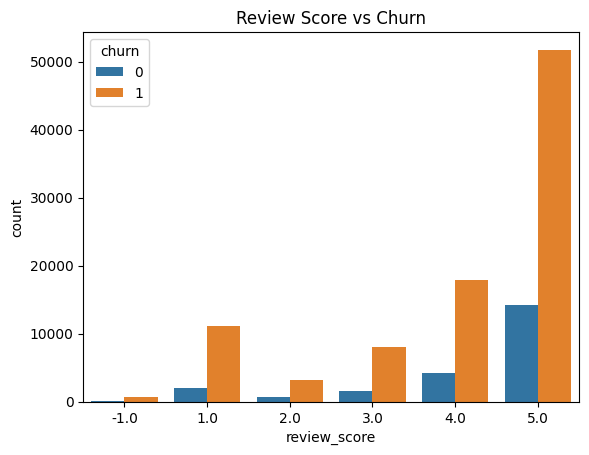

In [41]:
sns.countplot(x='review_score', hue='churn', data=df)
plt.title('Review Score vs Churn')
plt.show()

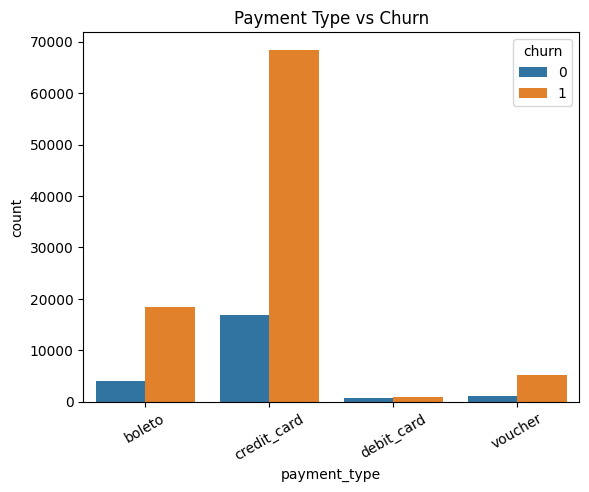

In [42]:
sns.countplot(x='payment_type', hue='churn', data=df)
plt.title('Payment Type vs Churn')
plt.xticks(rotation=30)
plt.show()

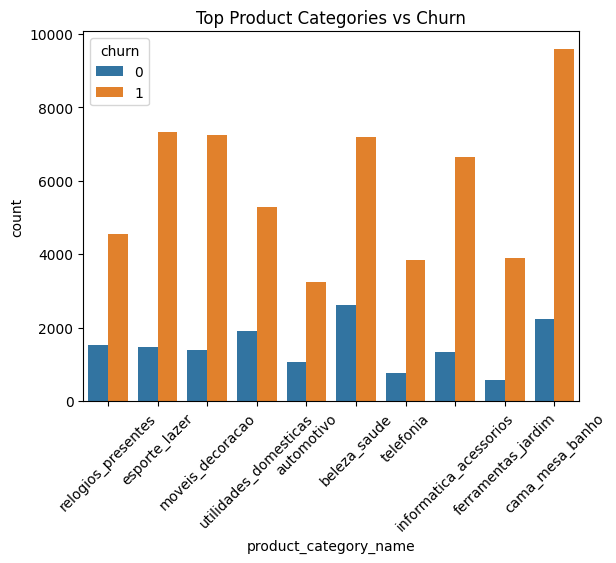

In [43]:
top_cat = df['product_category_name'].value_counts().nlargest(10).index
sns.countplot(data=df[df['product_category_name'].isin(top_cat)],
              x='product_category_name', hue='churn')
plt.title('Top Product Categories vs Churn')
plt.xticks(rotation=45)
plt.show()

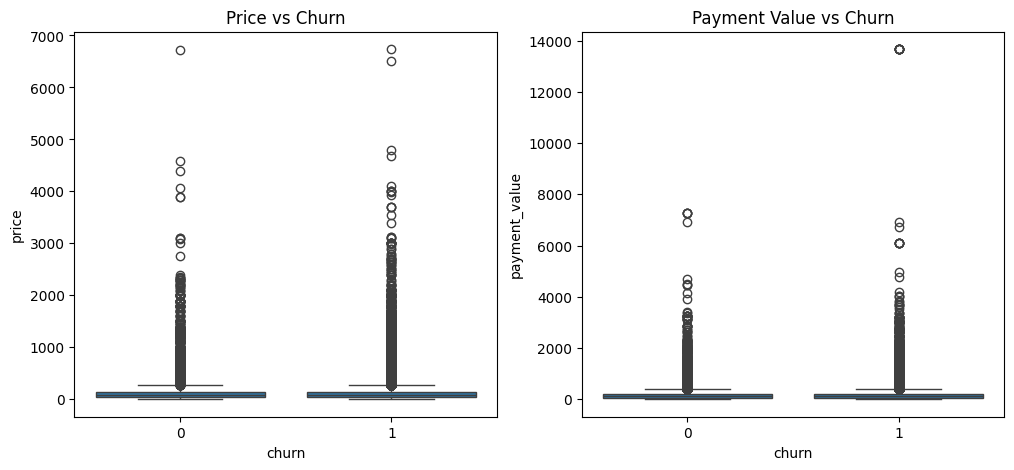

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x='churn', y='price', data=df, ax=axes[0])
sns.boxplot(x='churn', y='payment_value', data=df, ax=axes[1])
axes[0].set_title('Price vs Churn')
axes[1].set_title('Payment Value vs Churn')
plt.show()

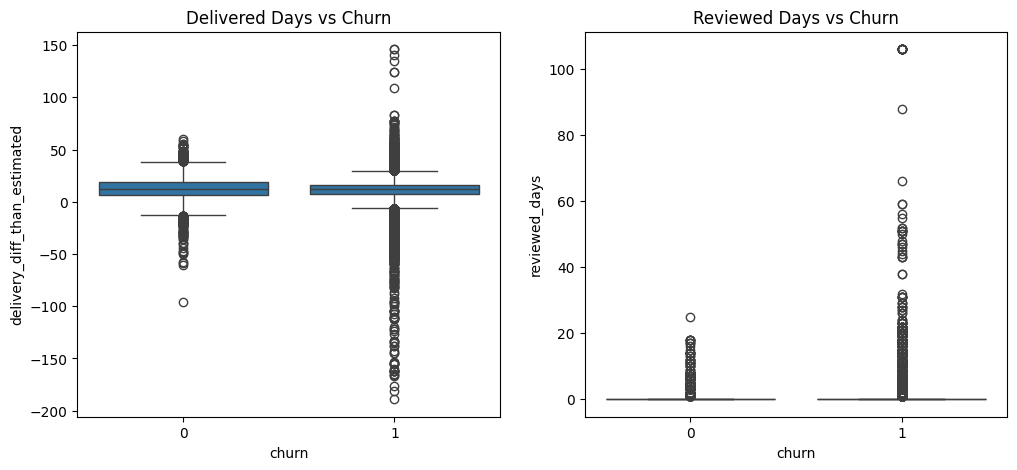

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x='churn', y='delivery_diff_than_estimated', data=df, ax=axes[0])
sns.boxplot(x='churn', y='reviewed_days', data=df, ax=axes[1])
axes[0].set_title('Delivered Days vs Churn')
axes[1].set_title('Reviewed Days vs Churn')
plt.show()

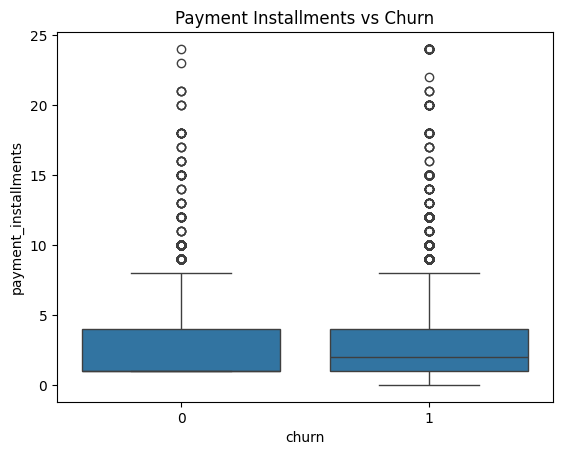

In [46]:
sns.boxplot(x='churn', y='payment_installments', data=df)
plt.title('Payment Installments vs Churn')
plt.show()

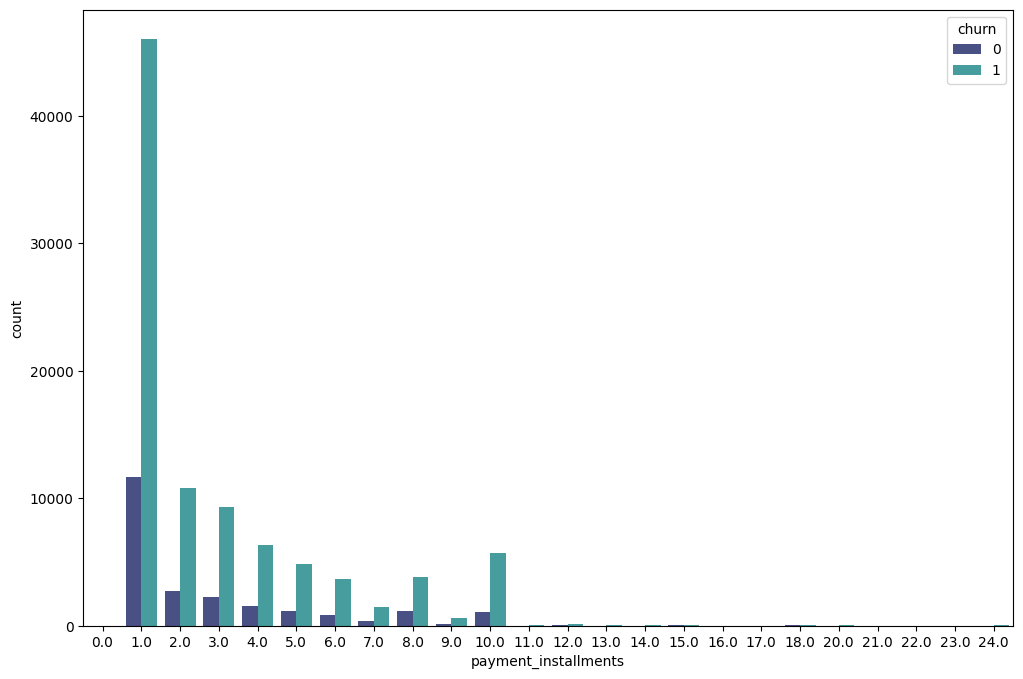

In [47]:
plt.figure(figsize=(12, 8))
sns.countplot(df, x='payment_installments', hue='churn', palette='mako')
plt.show()

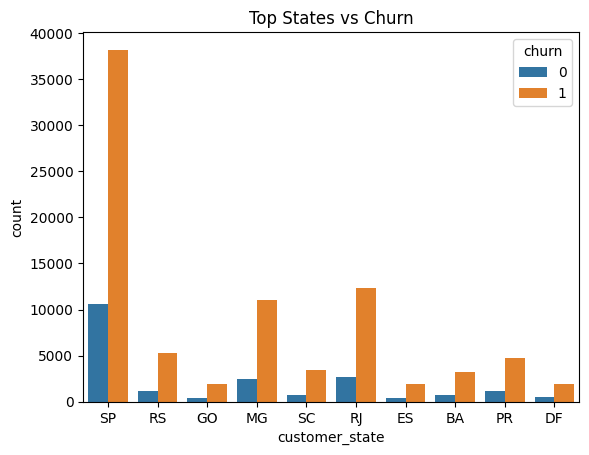

In [48]:
top_states = df['customer_state'].value_counts().nlargest(10).index
sns.countplot(data=df[df['customer_state'].isin(top_states)],
              x='customer_state', hue='churn')
plt.title('Top States vs Churn')
plt.show()

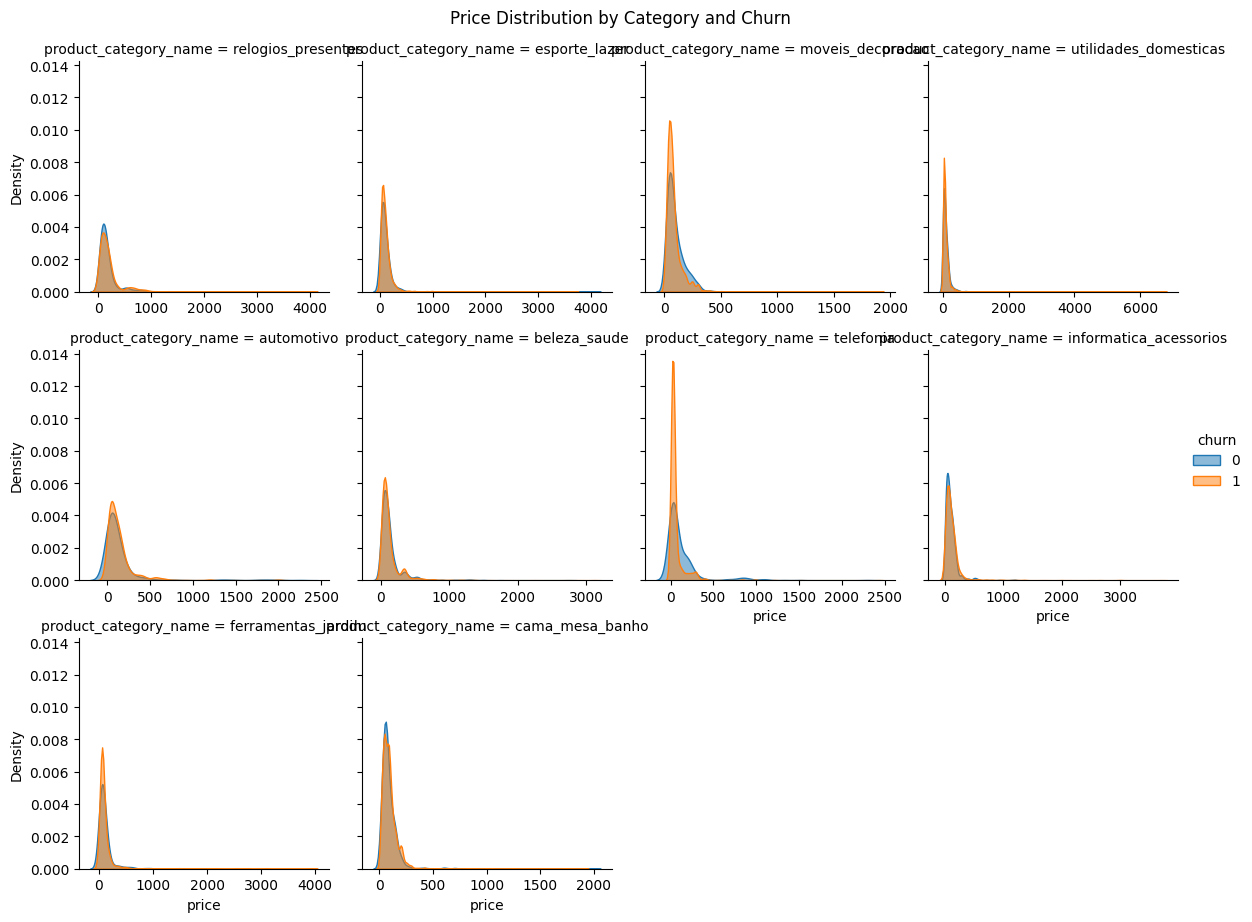

In [49]:
g = sns.FacetGrid(df[df['product_category_name'].isin(top_cat)],
                  col='product_category_name', hue='churn', col_wrap=4, height=3, sharex=False)
g.map(sns.kdeplot, 'price', fill=True, alpha=0.5)
g.add_legend()
g.fig.suptitle('Price Distribution by Category and Churn', y=1.02)
plt.show()

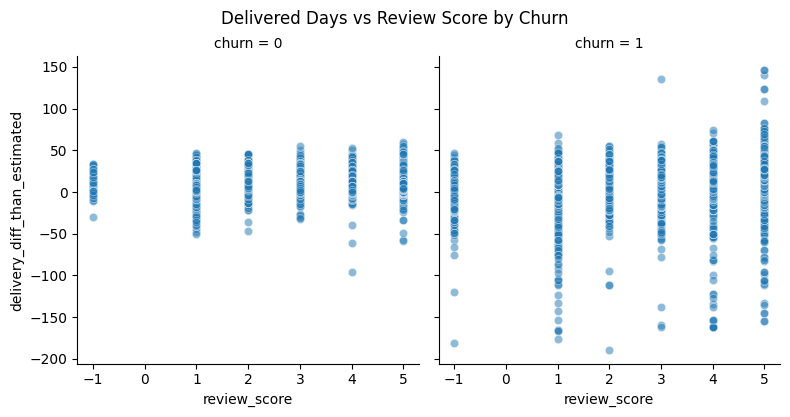

In [50]:
g = sns.FacetGrid(df, col='churn', height=4)
g.map(sns.scatterplot, 'review_score', 'delivery_diff_than_estimated', alpha=0.5)
g.fig.suptitle('Delivered Days vs Review Score by Churn', y=1.03)
plt.show()

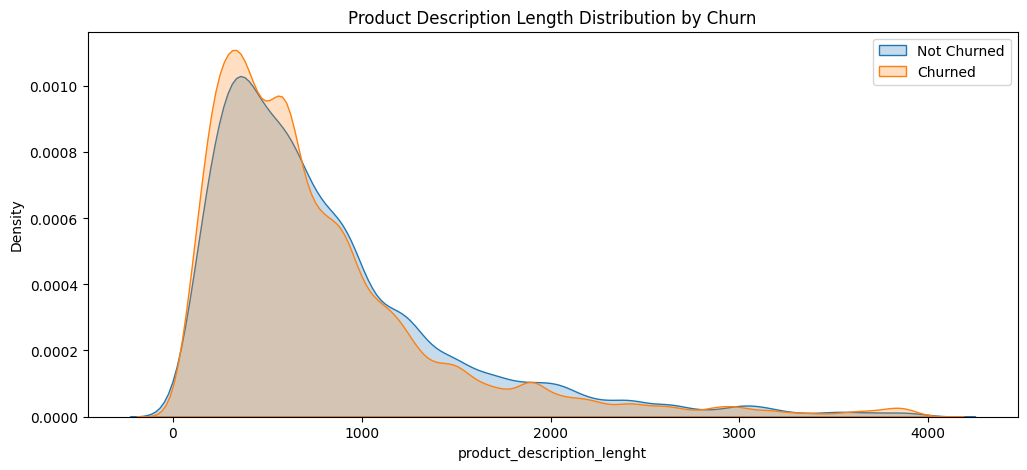

In [51]:
plt.figure(figsize=(12,5))
sns.kdeplot(df[df['churn']==0]['product_description_lenght'], label='Not Churned', fill=True)
sns.kdeplot(df[df['churn']==1]['product_description_lenght'], label='Churned', fill=True)
plt.title('Product Description Length Distribution by Churn')
plt.legend()
plt.show()

Insights:
1. Expensive or bulky items (furniture, home decor) tend to have higher churn, possibly due to delivery or satisfaction issues, while smaller, repeat-purchase categories (beauty, electronics accessories) are more stable.

2. Non-churners tend to review sooner after delivery, while churners review later (or never).

3. Churn depends less on pricing or payment details and more on delivery/review dynamics.

4. Slightly higher order values could reduce churn (more invested buyers).

5. If unusually high freight cost → higher churn risk.

6. Best model that will work here will be tree based models because
    1. We have mixed data types (categorical like payment_type, and numerical).
    2. Non-linear relationships (delivery delay → churn, not perfectly linear).
    3. Imbalanced dataset (~92k vs 22k).

7. Now we have so many irrelevant columns which don’t contribute to churn prediction. (product_description_lenght, product_photos_qty, payment_sequential, payment_value, review_score )

In [52]:
df.drop(columns=['product_description_lenght', 'product_photos_qty', 'payment_sequential', 'payment_value', 'review_score'], inplace=True)

In [53]:
# Final Data

In [54]:
df.fillna(0, inplace=True)

Now we have 3 categorical features need to encoded,

customer_state - 24 (use target encoding)

product_category_name - 73 (use frequency encoding)

payment_type - 4 (label encoding)

In [55]:
! pip install xgboost

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, roc_auc_score
import joblib

In [57]:
customer_state = df.groupby('customer_state')['churn'].mean()
df['customer_state_enc'] = df['customer_state'].map(customer_state)

product_category_name = df['product_category_name'].value_counts()
df['product_category_name_enc'] = df['product_category_name'].map(product_category_name)

le = LabelEncoder()
df['payment_type_enc'] = le.fit_transform(df['payment_type'])

In [58]:
df.drop(columns=['customer_state', 'product_category_name', 'payment_type'], inplace=True)

In [59]:
x = df.drop('churn', axis=1)
y = df['churn']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

Parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Baseline LR ROC-AUC: 0.575002610149949
Baseline LR Accuracy: 0.8024109920497753
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best LR Params: {'clf__C': 10, 'clf__solver': 'liblinear'}

Logistic Regression Final Results:
ROC-AUC: 0.5750562692913073
Accuracy: 0.8024541997926028
Confusion Matrix:
 [[   22  4543]
 [   29 18550]]


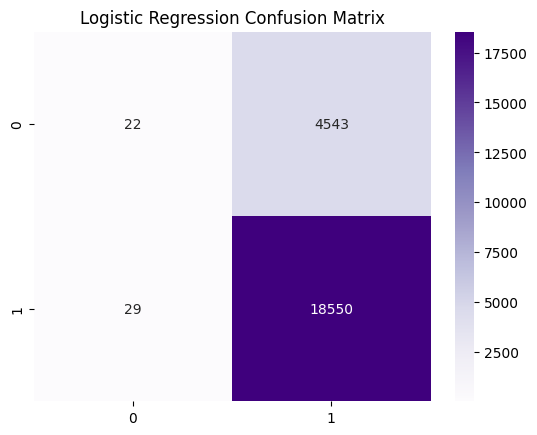

In [61]:
# ---------------- Baseline ----------------
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=500, random_state=42))
])

lr_pipeline.fit(x_train, y_train)
lr_preds = lr_pipeline.predict(x_test)
lr_probs = lr_pipeline.predict_proba(x_test)[:, 1]

print("Parameters:", lr_pipeline.named_steps['clf'].get_params())
print("Baseline LR ROC-AUC:", roc_auc_score(y_test, lr_probs))
print("Baseline LR Accuracy:", accuracy_score(y_test, lr_preds))

# ---------------- Grid Search ----------------
lr_params = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__solver': ['lbfgs', 'liblinear']
}

lr_grid = GridSearchCV(
    lr_pipeline,
    param_grid=lr_params,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)
lr_grid.fit(x_train, y_train)

print("Best LR Params:", lr_grid.best_params_)

# ---------------- Final Evaluation ----------------
lr_best = lr_grid.best_estimator_
lr_preds = lr_best.predict(x_test)
lr_probs = lr_best.predict_proba(x_test)[:, 1]

lr_auc = roc_auc_score(y_test, lr_probs)
lr_acc = accuracy_score(y_test, lr_preds)
lr_cm = confusion_matrix(y_test, lr_preds)

print("\nLogistic Regression Final Results:")
print("ROC-AUC:", lr_auc)
print("Accuracy:", lr_acc)
print("Confusion Matrix:\n", lr_cm)

sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Purples')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [65]:
from google.colab import drive
import os
drive.mount('/content/drive')

os.mkdir('/content/drive/MyDrive/churn_models')
joblib.dump(lr_pipeline, '/content/drive/MyDrive/churn_models/logistic_regression_model.pkl')
joblib.dump(lr_grid, '/content/drive/MyDrive/churn_models/logistic_regression_grid.pkl')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/MyDrive/churn_models/logistic_regression_grid.pkl']

Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Baseline RF Accuracy: 0.8822589007950224
Baseline RF ROC-AUC: 0.9118683975070606
Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best RF Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

 Random Forest Final Results:
ROC-AUC: 0.9138038406433154
Accuracy: 0.8821292775665399
Confusion Matrix:
 [[ 2201  2364]
 [  364 18215]]


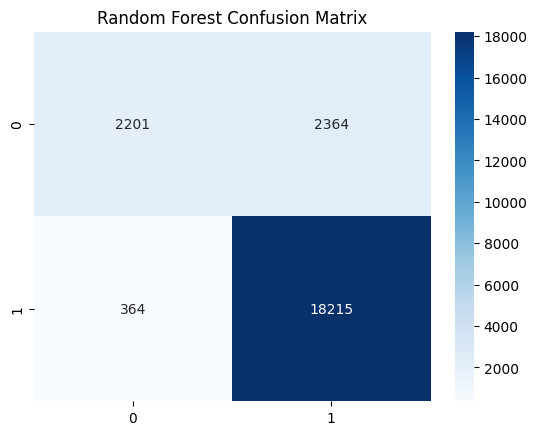

In [67]:
# ---------------- Baseline Model ----------------
rf_baseline = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_baseline.fit(x_train, y_train)

rf_preds = rf_baseline.predict(x_test)
rf_probs = rf_baseline.predict_proba(x_test)[:, 1]

print("Parameters:", rf_baseline.get_params())
print("Baseline RF Accuracy:", accuracy_score(y_test, rf_preds))
print("Baseline RF ROC-AUC:", roc_auc_score(y_test, rf_probs))

# ---------------- Grid Search ----------------
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=rf_params,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=10
)
rf_grid.fit(x_train, y_train)

print("Best RF Params:", rf_grid.best_params_)

# ---------------- Final Evaluation ----------------
rf_best = rf_grid.best_estimator_
rf_preds = rf_best.predict(x_test)
rf_probs = rf_best.predict_proba(x_test)[:, 1]

rf_auc = roc_auc_score(y_test, rf_probs)
rf_acc = accuracy_score(y_test, rf_preds)
rf_cm = confusion_matrix(y_test, rf_preds)

print("\n Random Forest Final Results:")
print("ROC-AUC:", rf_auc)
print("Accuracy:", rf_acc)
print("Confusion Matrix:\n", rf_cm)

sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

In [68]:
joblib.dump(rf_baseline, '/content/drive/MyDrive/churn_models/random_forest_model.pkl')
joblib.dump(rf_grid, '/content/drive/MyDrive/churn_models/random_forest_grid.pkl')

['/content/drive/MyDrive/churn_models/random_forest_grid.pkl']

Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Baseline GB Accuracy: 0.820687867265814
Baseline GB ROC-AUC: 0.7847114247103352
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best GB Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

 Gradient Boosting Final Results:
ROC-AUC: 0.8714687471463
Accuracy: 0.8589699274109921
Confusion Matrix:
 [[ 1633  2932]
 [  332 18247]]


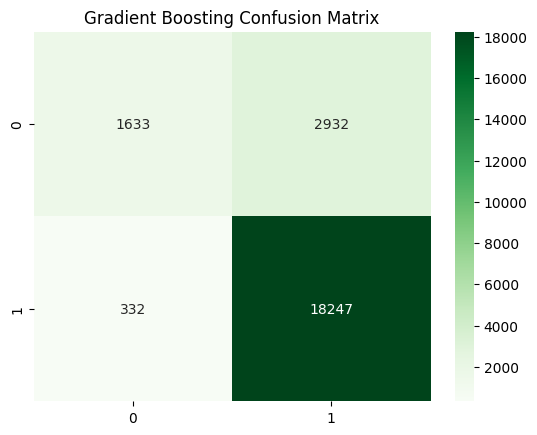

In [69]:
# ---------------- Baseline ----------------
gb_baseline = GradientBoostingClassifier(random_state=42)
gb_baseline.fit(x_train, y_train)

gb_preds = gb_baseline.predict(x_test)
gb_probs = gb_baseline.predict_proba(x_test)[:, 1]

print("Parameters:", rf_baseline.get_params())
print("Baseline GB Accuracy:", accuracy_score(y_test, gb_preds))
print("Baseline GB ROC-AUC:", roc_auc_score(y_test, gb_probs))

# ---------------- Grid Search ----------------
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

gb_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid=gb_params,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)
gb_grid.fit(x_train, y_train)

print("Best GB Params:", gb_grid.best_params_)

# ---------------- Final Evaluation ----------------
gb_best = gb_grid.best_estimator_
gb_preds = gb_best.predict(x_test)
gb_probs = gb_best.predict_proba(x_test)[:, 1]

gb_auc = roc_auc_score(y_test, gb_probs)
gb_acc = accuracy_score(y_test, gb_preds)
gb_cm = confusion_matrix(y_test, gb_preds)

print("\n Gradient Boosting Final Results:")
print("ROC-AUC:", gb_auc)
print("Accuracy:", gb_acc)
print("Confusion Matrix:\n", gb_cm)

sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Greens')
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

In [70]:
joblib.dump(gb_baseline, '/content/drive/MyDrive/churn_models/gradient_boosting_model.pkl')
joblib.dump(gb_grid, '/content/drive/MyDrive/churn_models/gradient_boosting_grid.pkl')

['/content/drive/MyDrive/churn_models/gradient_boosting_grid.pkl']

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:47:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Parameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 300, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.8, 'tree_method': 'hist', 'validate_parameters': None, 'verbosity': None, 'predictor': 'gpu_predictor', 'use_label_encoder': False}
Baselin

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:48:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGB Params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}

 XGBoost Final Results:
ROC-AUC: 0.8843939797768353
Accuracy: 0.8618216384376081
Confusion Matrix:
 [[ 1819  2746]
 [  452 18127]]


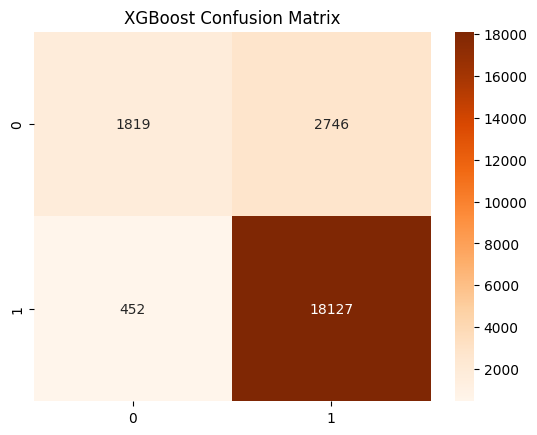

In [72]:
# ---------------- Baseline ----------------
xgb_baseline = XGBClassifier(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        tree_method='hist',
        predictor='gpu_predictor',
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
xgb_baseline.fit(x_train, y_train)

xgb_preds = xgb_baseline.predict(x_test)
xgb_probs = xgb_baseline.predict_proba(x_test)[:, 1]

print("Parameters:", xgb_baseline.get_params())
print("Baseline XGB Accuracy:", accuracy_score(y_test, xgb_preds))
print("Baseline XGB ROC-AUC:", roc_auc_score(y_test, xgb_probs))

# ---------------- Grid Search ----------------
xgb_params = {
    'n_estimators': [100, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ),
    param_grid=xgb_params,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)
xgb_grid.fit(x_train, y_train)

print("Best XGB Params:", xgb_grid.best_params_)

# ---------------- Final Evaluation ----------------
xgb_best = xgb_grid.best_estimator_
xgb_preds = xgb_best.predict(x_test)
xgb_probs = xgb_best.predict_proba(x_test)[:, 1]

xgb_auc = roc_auc_score(y_test, xgb_probs)
xgb_acc = accuracy_score(y_test, xgb_preds)
xgb_cm = confusion_matrix(y_test, xgb_preds)

print("\n XGBoost Final Results:")
print("ROC-AUC:", xgb_auc)
print("Accuracy:", xgb_acc)
print("Confusion Matrix:\n", xgb_cm)

sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Oranges')
plt.title("XGBoost Confusion Matrix")
plt.show()

In [73]:
joblib.dump(xgb_baseline, '/content/drive/MyDrive/churn_models/xgboost_model.pkl')
joblib.dump(xgb_grid, '/content/drive/MyDrive/churn_models/xgboost_grid.pkl')

['/content/drive/MyDrive/churn_models/xgboost_grid.pkl']

,Model,ROC-AUC,Accuracy
0,Random Forest,0.913804,0.882129
2,XGBoost,0.884394,0.861822
1,Gradient Boosting,0.871469,0.858970
3,Logistic Regression,0.575056,0.802454


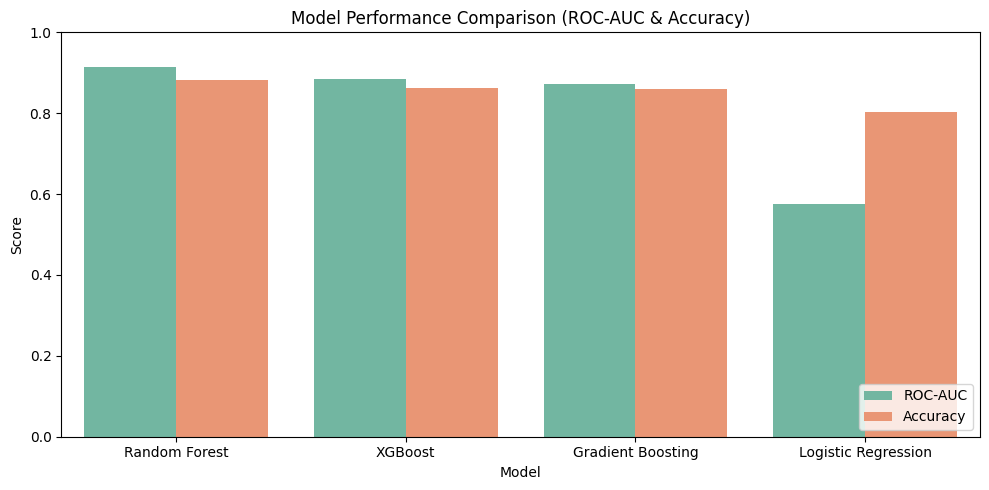

In [74]:
results = [
    {
        'Model': 'Random Forest',
        'ROC-AUC': rf_auc,
        'Accuracy': rf_acc
    },
    {
        'Model': 'Gradient Boosting',
        'ROC-AUC': gb_auc,
        'Accuracy': gb_acc
    },
    {
        'Model': 'XGBoost',
        'ROC-AUC': xgb_auc,
        'Accuracy': xgb_acc
    },
    {
        'Model': 'Logistic Regression',
        'ROC-AUC': lr_auc,
        'Accuracy': lr_acc
    }
]

model_comparison = pd.DataFrame(results).sort_values(by='ROC-AUC', ascending=False)
display(model_comparison)

plt.figure(figsize=(10,5))
sns.barplot(data=model_comparison.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Model', y='Score', hue='Metric', palette='Set2')
plt.title("Model Performance Comparison (ROC-AUC & Accuracy)")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()